In [ ]:
import tensorflow as tf # Imports tensorflow

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Accuracy,Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
#import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# # **Testing The data and Format**

In [1]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/
%ls

Mounted at /content/drive
/content/drive/MyDrive
'Colab Notebooks'/   Figures/   LungCancer/   Model2.pdf


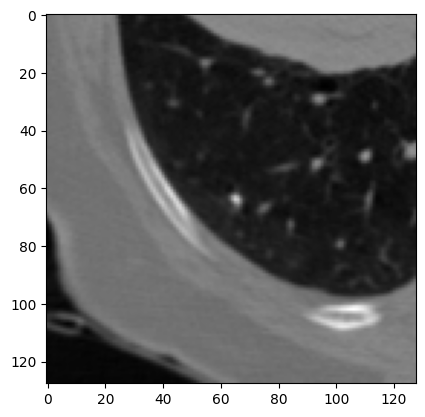

In [ ]:
images=[]
masks=[]
y=[]
gr_shape=(128,128,1)
img_shape = (128,128,3)
Thres = 1000
input_dir="/content/drive/MyDrive/LungCancer/Datasets/LIDC-IDRI-slices/"
out_dir = "/content/drive/MyDrive/LungCancer/ModelRun"
plt.imshow(img)
plt.show()

In [ ]:
np.asarray(img).shape

(128, 128, 3)

In [ ]:
np.array(images).shape

(0,)

In [ ]:
np.array(masks).shape

(0,)

In [ ]:
images=[]

y=[]
for nodule in os.listdir('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001'):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/images/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-0/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-1/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-2/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-3/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)

/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-6.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-7.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-4.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-2.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-8.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-3.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-5.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-0.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-1.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-6.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-7.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-4.png
/kag

In [ ]:
i=7
print(mask0[i].sum())
print(mask1[i].sum())
print(mask2[i].sum())
print(mask3[i].sum())


289935
0
102510
237915


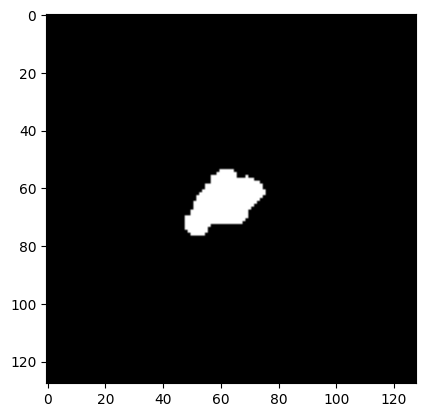

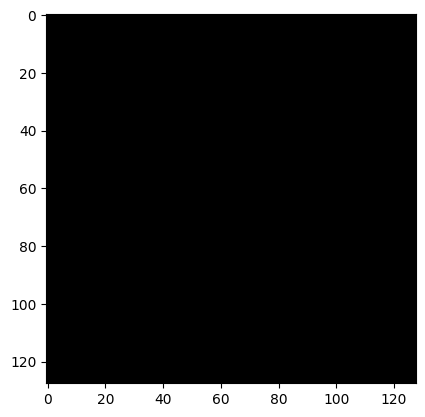

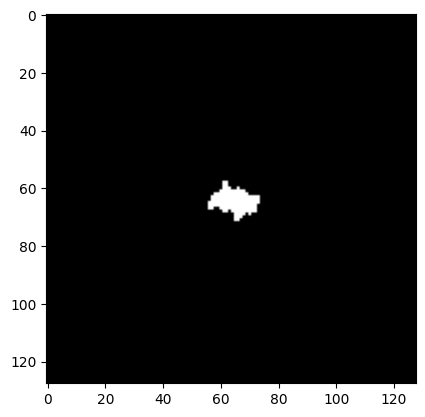

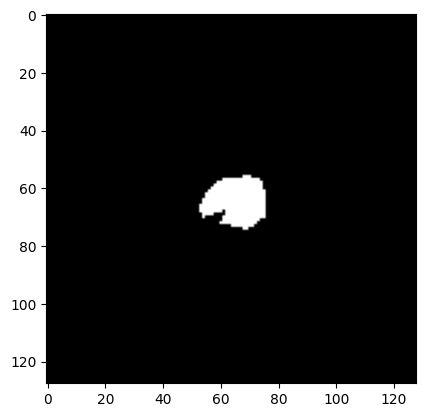

In [ ]:
plt.imshow(mask0[i])
plt.show()
plt.imshow(mask1[i])
plt.show()
plt.imshow(mask2[i])
plt.show()
plt.imshow(mask3[i])
plt.show()

In [ ]:
Thres = 100000

In [ ]:
gmask=[]
for i in range(len(mask0)):
    white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
    cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
    print(cnt)
    if(cnt>2):
        print("ID ="+str(white_sum.argmax()))
        print(white_sum)

4
ID =0
[515610 435285 481185 510255]
4
ID =0
[465885 230265 292995 364905]
4
ID =0
[694620 639540 635715 672435]
4
ID =0
[648720 572985 561510 562275]
0
4
ID =0
[710685 688500 684675 681615]
4
ID =0
[614295 563805 574515 596700]
3
ID =0
[289935      0 102510 237915]
4
ID =0
[577575 398565 457470 509490]


# # **Run From Here**

In [ ]:
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="/kaggle/input/lidcidri/LIDC-IDRI-slices"
images=[]
masks=[]
y=[]
Thres = 1000

In [ ]:
for patient in os.listdir(input_dir):
    for nodule in os.listdir(input_dir+'/'+patient):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/images/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-0/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-1/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-2/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-3/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)
        for i in range(len(mask0)):
            white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
            cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
            if(cnt>2):
                y.append(1)
                if white_sum.argmax()==0:
                    masks.append(mask0[i])
                elif white_sum.argmax()==1:
                    masks.append(mask1[i])
                elif white_sum.argmax()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])
            else:
                y.append(0)
                if white_sum.argmin()==0:
                    masks.append(mask0[i])
                elif white_sum.argmin()==1:
                    masks.append(mask1[i])
                elif white_sum.argmin()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])

In [ ]:
images=np.array(images)
masks=np.array(masks)
label=np.array(y)

In [ ]:
print(images.shape)
print(masks.shape)
print(label.shape)

(15548, 128, 128, 3)
(15548, 128, 128, 3)
(15548,)


In [ ]:
yy=pd.DataFrame(label)
yy.value_counts()

0    7992
1    7556
dtype: int64

# **Skip from here for transfer learning**

In [ ]:
plt.imshow(images[0])

In [ ]:
plt.imshow(masks[0])

In [ ]:
plt.imshow(images[0]*masks[0])

In [ ]:
def blockred(inp,filters):
    x = Conv2D(filters, 1, activation="relu",padding='same',use_bias=False)(inp)
    x = layers.MaxPooling2D(2)(x)
    x = BatchNormalization(axis=1)(x)

    y = Conv2D(filters,1,activation="relu", padding='same',use_bias=False,)(inp)
    y = Conv2D(filters,3,activation="relu", padding='same',use_bias=False,)(y)
    y = layers.MaxPooling2D(2)(y)
    y = BatchNormalization(axis=1)(y)
    y = Dropout(0.25)(y)
    z = Conv2D(filters, 3, activation="relu", padding='same',use_bias=False)(inp)
    z = layers.MaxPooling2D(2)(z)
    z = BatchNormalization(axis=1)(z)
    output1 = layers.add([x,y,z])
    return output1

In [ ]:
Name = "Seq3cnn"
inputs = keras.Input(shape=img_shape, name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization(axis=-1)(x)
x = Dropout(0.25)(x)

y = blockred(x,64)
y = Conv2D(filters=128, kernel_size=(5, 5), activation='relu')(y)
y = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D((2,2))(y)
y = BatchNormalization(axis=-1)(y)
y = Dropout(0.25)(y)
y = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D((2,2))(y)
y = BatchNormalization(axis=-1)(y)
y = Dropout(0.25)(y)
y = Flatten()(y)
y = Dense(256, activation='relu')(y)
y = Dropout(0.5)(y)
y = Dense(64, activation='sigmoid')(y)
y = Dropout(0.5)(y)
outputs=Dense(1, activation='sigmoid')(y)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(),  loss=keras.losses.BinaryCrossentropy() , metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=64)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

model.save(Name+'.h5')
pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)


# # **And From here**

In [ ]:
x_train,x_test,y_train,y_test,mask_train,mask_test = train_test_split(images,label,masks,train_size=0.8, random_state=7)
print(x_train.shape)
print(y_train.shape)

(12438, 128, 128, 3)
(12438,)


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.convnext import ConvNeXtSmall
from tensorflow.keras.applications.convnext import ConvNeXtLarge
from tensorflow.keras.applications.convnext import ConvNeXtBase

In [ ]:
"""
classifier = ResNet152V2(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 100
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

# uncomment here
classifier = EfficientNetB7(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 500
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

# uncomment here

classifier = VGG19(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )

fine_tune_at = 20
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

classifier = ConvNeXtSmall(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )

fine_tune_at = 100
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False
     """
classifier = VGG16(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )

fine_tune_at = 10
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
Name='VGG16'
model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_5 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 128)               1048704   
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                      

Epoch 1/100
195/195 [==============================] - 20s 82ms/step - loss: 0.0698 - acc: 0.9772 - recall_2: 0.9747 - precision_2: 0.9785 - auc_2: 0.9951 - true_positives_2: 5906.0000 - true_negatives_2: 6249.0000 - false_negatives_2: 153.0000 - false_positives_2: 130.0000 - val_loss: 0.5582 - val_acc: 0.8473 - val_recall_2: 0.8036 - val_precision_2: 0.8692 - val_auc_2: 0.9048 - val_true_positives_2: 1203.0000 - val_true_negatives_2: 1432.0000 - val_false_negatives_2: 294.0000 - val_false_positives_2: 181.0000
Epoch 2/100
195/195 [==============================] - 14s 74ms/step - loss: 0.0762 - acc: 0.9762 - recall_2: 0.9744 - precision_2: 0.9767 - auc_2: 0.9943 - true_positives_2: 5904.0000 - true_negatives_2: 6238.0000 - false_negatives_2: 155.0000 - false_positives_2: 141.0000 - val_loss: 0.5679 - val_acc: 0.8367 - val_recall_2: 0.8103 - val_precision_2: 0.8441 - val_auc_2: 0.8974 - val_true_positives_2: 1213.0000 - val_true_negatives_2: 1389.0000 - val_false_negatives_2: 284.0000 

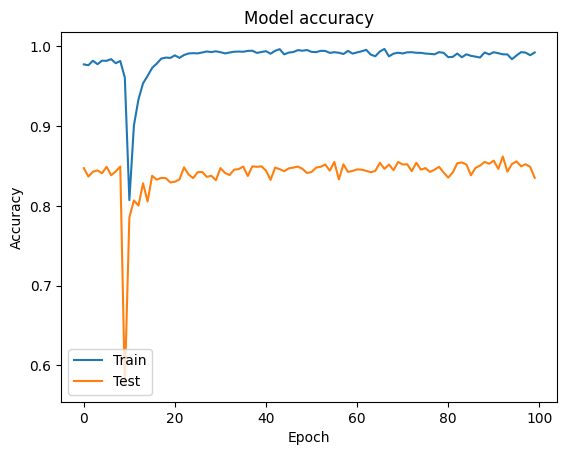

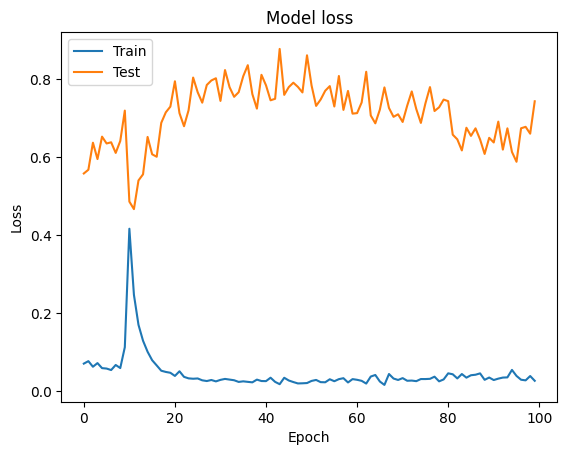

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile (optimizer= keras.optimizers.Adam(),  loss=keras.losses.BinaryCrossentropy() , metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)

checkpoint_filepath = 'checkpoint.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    save_freq=5000)

early_stopping = EarlyStopping(
    monitor='val_acc',
    patience=15,
    min_delta=0.001,
    mode='max',
    restore_best_weights=True
)


history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=64)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()



model.save(Name+'.h5')

pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)